In [1]:
import numpy as np
import math
import matplotlib as mpl
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
from qiskit.providers.ibmq import *
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
sim = Aer.get_backend('qasm_simulator')
import  qiskit.circuit.library.grover_operator

The 2x2 Sudoku is implemented in 2 different ways. One is the usual circuit construction, the other is using the PhaseOracle.

In [2]:
# Constraints for 2x2 sudoku
cnst = [(0,1),(0,2),(1,3),(2,3)]

In [3]:
def sud2x2():
    var = QuantumRegister(4,"var")
    wrk = QuantumRegister(4,"wrk")
    out = QuantumRegister(1,"out")
    mes = ClassicalRegister(4,"mes")
    qc = QuantumCircuit(var,wrk,out,mes)
    qc.h(var)
    qc.x(out)
    qc.h(out)
    mt = -1*np.identity(16)
    mt[0][0]=1
    op = qi.Operator(mt)
    for qwre in range(2):
        i=0
        for x in cnst:
            qc.cx(var[x[0]],wrk[i])
            qc.cx(var[x[1]],wrk[i])
            i+=1
        qc.mct(wrk,out)
        i=0
        for x in cnst:
            qc.cx(var[x[0]],wrk[i])
            qc.cx(var[x[1]],wrk[i])
            i+=1
        qc.barrier()
        qc.h(var)
        qc.append(op,var)
        qc.h(var)
        qc.barrier()
    qc.measure(var,mes)
    return qc


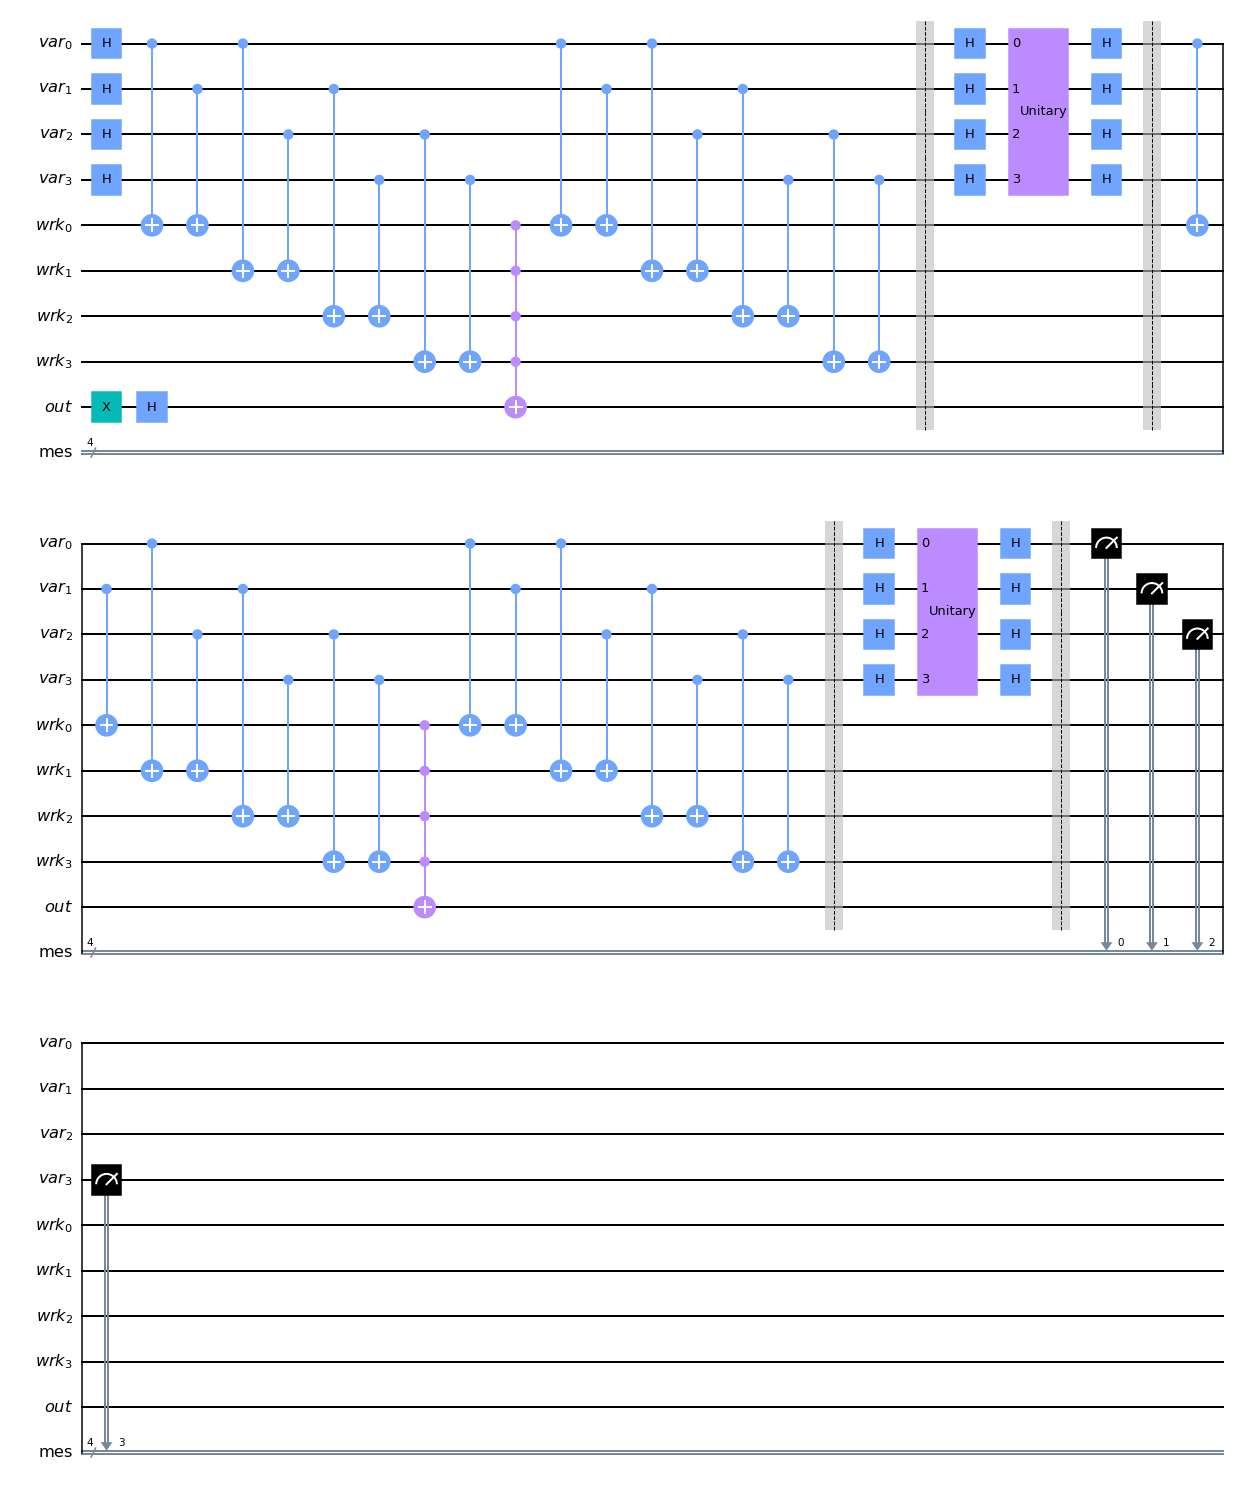

In [4]:
qc=sud2x2()
qc.draw('mpl')

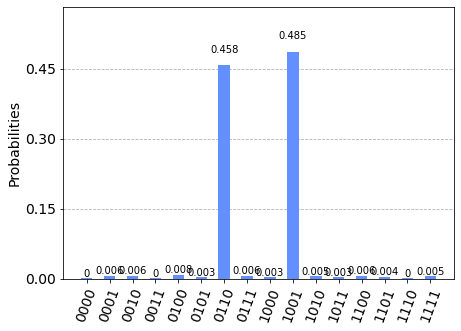

In [5]:
plot_histogram(
    execute(qc,sim,shots=1024).result().get_counts()
)

In [6]:
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.utils import QuantumInstance

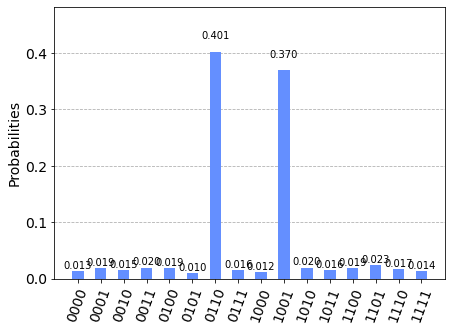

In [7]:
expression = '(x1^x2)&(x1^x3)&(x2^x4)&(x3^x4)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(quantum_instance=QuantumInstance(Aer.get_backend('qasm_simulator'), shots=1024))
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)